In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
all_evaluation=glob.glob('../results/**/evaluation.csv', recursive=True)

In [3]:
evaluation_dicts={
    tuple(file.split(os.path.sep)[-4:-1]):pd.read_csv(file).T.rename(columns={
        0: 'RMSE',
        1: 'MBE',
        2: 'R2',
    }) 
    for file in all_evaluation
}

In [6]:
combined_evals=(
    pd.concat(list(evaluation_dicts.values()))
    .reset_index()
    .set_index(
        pd.MultiIndex.from_tuples(
            [
                (model, 'FullDataset', var)
                if land_cover == 'AllCombined'
                else (model, land_cover, var)
                for (model, land_cover, var) in [j for j in list(evaluation_dicts.keys()) for _ in range(2)]
            ]
        )
    )
)

combined_evals

index      RMSE           MBE  \
NNets      NoVegetation baseline   pytorch_nn_train  0.238513  1.468354e-03   
                        baseline    pytorch_nn_test  0.239185  2.382150e-03   
                        uavsar     pytorch_nn_train  0.157861  9.452646e-03   
                        uavsar      pytorch_nn_test  0.159623  9.676993e-03   
           FullDataset  baseline   pytorch_nn_train  0.250086  1.113311e-02   
                        baseline    pytorch_nn_test  0.249557  1.146438e-02   
                        uavsar     pytorch_nn_train  0.164909  9.347508e-03   
                        uavsar      pytorch_nn_test  0.165037  9.698529e-03   
                        all        pytorch_nn_train  0.154906 -9.469306e-03   
                        all         pytorch_nn_test  0.155443 -8.986168e-03   
           Vegetation   baseline   pytorch_nn_train  0.228280  6.141112e-03   
                        baseline    pytorch_nn_test  0.227928  5.876385e-03   
                        uavsar     pytorch_nn_train  0.167844  3.693555e-03   
                        uavsar      pytorch_nn_test  0.168812  3.467992e-03   
                        all        pytorch_nn_train  0.149765 -8.733784e-04   
                        all         pytorch_nn_test  0.151534 -1.002038e-03   
ExtraTrees NoVegetation baseline  extra_trees_train  0.191313 -1.842965e-17   
                        baseline   extra_trees_test  0.226129  1.200466e-03   
                        uavsar    extra_trees_train  0.001247  0.000000e+00   
                        uavsar     extra_trees_test  0.099829  1.569147e-04   
           FullDataset  baseline  extra_trees_train  0.199198  7.252473e-18   
                        baseline   extra_trees_test  0.236293  3.055893e-04   
                        uavsar    extra_trees_train  0.001215  0.000000e+00   
                        uavsar     extra_trees_test  0.101268  2.834051e-04   
                        all       extra_trees_train  0.000719  0.000000e+00   
                        all        extra_trees_test  0.099106  2.604292e-04   
           Vegetation   baseline  extra_trees_train  0.135389 -5.927561e-18   
                        baseline   extra_trees_test  0.206534  3.374736e-04   
                        uavsar    extra_trees_train  0.000964  0.000000e+00   
                        uavsar     extra_trees_test  0.103928  4.113934e-05   
                        all       extra_trees_train  0.000267  0.000000e+00   
                        all        extra_trees_test  0.104882 -5.035757e-04   
XGBoost    NoVegetation baseline      xgboost_train  0.237155 -2.760440e-06   
                        baseline       xgboost_test  0.238115  8.961712e-04   
                        uavsar        xgboost_train  0.012016  8.769661e-09   
                        uavsar         xgboost_test  0.093725  1.347675e-04   
           FullDataset  baseline      xgboost_train  0.248801 -1.755214e-06   
                        baseline       xgboost_test  0.248496  3.286213e-04   
                        uavsar        xgboost_train  0.013850  8.256242e-09   
                        uavsar         xgboost_test  0.097367  3.654146e-04   
                        all           xgboost_train  0.008482  3.960739e-09   
                        all            xgboost_test  0.092769  1.963226e-04   
           Vegetation   baseline      xgboost_train  0.227302 -1.599045e-05   
                        baseline       xgboost_test  0.227505 -2.035415e-04   
                        uavsar        xgboost_train  0.014992  6.800677e-09   
                        uavsar         xgboost_test  0.102344  2.333223e-04   
                        all           xgboost_train  0.006767  9.185928e-09   
                        all            xgboost_test  0.098444 -4.190954e-04   

                                        R2  
NNets      NoVegetation baseline  0.340466  
                        baseline  0.336930  
                        uavsar    0.711

In [5]:
combined_evals=(
    combined_evals
    .reset_index()
    .rename(columns={
        'level_0': 'Model',
        'level_1': 'LandCover',
        'level_2': 'Features',
    })
)

training_evals=(
    combined_evals[
        combined_evals["index"].str.contains("train", case=False)
    ]
    .drop(columns="index")
)

testing_evals=(
    combined_evals[
        combined_evals["index"].str.contains("test", case=False)
    ]
    .drop(columns="index")
)

testing_evals.round(4).to_csv("../results/testing_evaluation_comparison.csv")
training_evals.round(4).to_csv("../results/training_evaluation_comparison.csv")

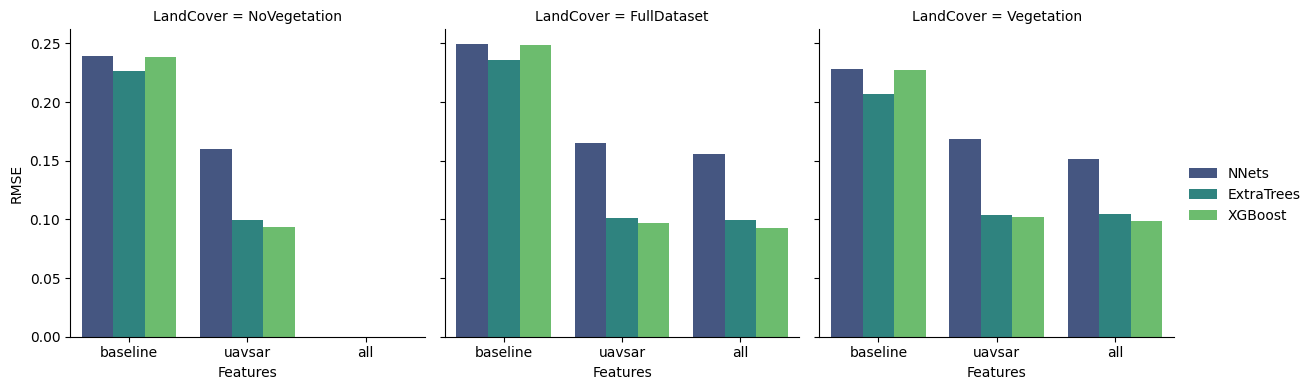

In [6]:
g = sns.FacetGrid(testing_evals, col="LandCover", col_wrap=3, height=4)
g = g.map(sns.barplot, 'Features', 'RMSE', 'Model', palette='viridis', order=testing_evals['Features'].unique(), hue_order=testing_evals['Model'].unique())
g.add_legend()
plt.show()

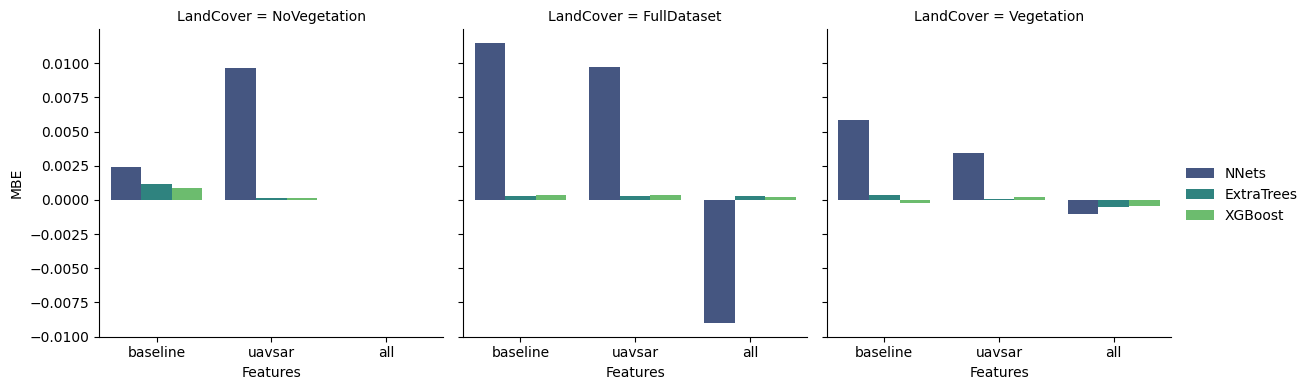

In [7]:
g = sns.FacetGrid(testing_evals, col="LandCover", col_wrap=3, height=4)
g = g.map(sns.barplot, 'Features', 'MBE', 'Model', palette='viridis', order=testing_evals['Features'].unique(), hue_order=testing_evals['Model'].unique())
g.add_legend()
plt.show()

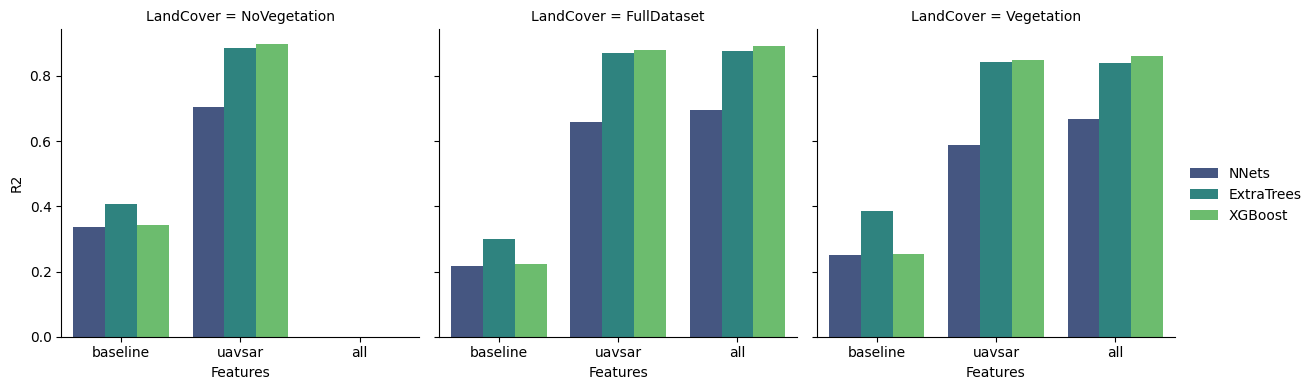

In [8]:
g = sns.FacetGrid(testing_evals, col="LandCover", col_wrap=3, height=4)
g = g.map(sns.barplot, 'Features', 'R2', 'Model', palette='viridis', order=testing_evals['Features'].unique(), hue_order=testing_evals['Model'].unique())
g.add_legend()
plt.show()

## Feature Importance

In [25]:
xgboost_all=pd.read_csv('../results/XGBoost/AllCombined/all/feature_importances.csv')
xgboost_all=xgboost_all.sort_values(by='importance', ascending=True)
xgboost_all

,feature,importance
6,wrapped_phase,0.012034
5,coherence,0.012586
4,vegetation_ht,0.022043
3,incidence_angle,0.027614
2,amplitude,0.031821
1,bare_earth_dem,0.037140
0,unwrapped_phase,0.068860


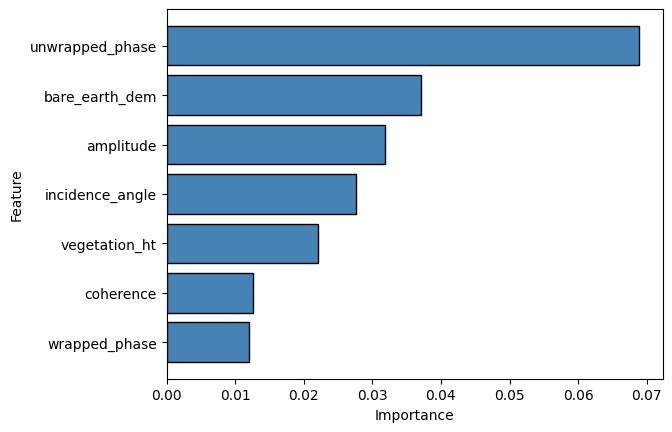

In [33]:
plt.barh(xgboost_all['feature'], xgboost_all['importance'], edgecolor='black', color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Shap

In [19]:
import shap

In [ ]:
hb=plt.hexbin(full_splits['y_temp'], preds, gridsize=10, cmap='Oranges', mincnt=1) # BuGn_r, Greens, YlGnBu, YlOrRd, Oranges, Reds, Blues, Purples, Greys, PuRd, RdPu, BuPu, GnBu, PuBu, YlGn, YlOrBr, Purples, Greys, PuRd, RdPu, BuPu, GnBu, PuBu, YlGn, YlOrBr
plt.colorbar(hb)